In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = np.load('../assets/proyecto_training_data.npy')
data

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [3]:
n = len(data)
n80 = int(n * 0.8)

In [4]:
data_training = data[0:n80]
data_testing = data[n80:n]
data_training

array([[2.0850e+05, 7.0000e+00, 8.5600e+02, 8.0000e+00, 2.0030e+03,
        6.5000e+01],
       [1.8150e+05, 6.0000e+00, 1.2620e+03, 6.0000e+00, 1.9760e+03,
        8.0000e+01],
       [2.2350e+05, 7.0000e+00, 9.2000e+02, 6.0000e+00, 2.0010e+03,
        6.8000e+01],
       ...,
       [2.3317e+05, 7.0000e+00, 1.5020e+03, 7.0000e+00, 2.0090e+03,
        7.9000e+01],
       [2.4535e+05, 8.0000e+00, 1.6940e+03, 7.0000e+00, 2.0080e+03,
        6.4000e+01],
       [1.7300e+05, 6.0000e+00, 9.5900e+02, 7.0000e+00, 2.0000e+03,
        5.8000e+01]])

In [5]:
training_df = pd.DataFrame(data_training, columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
training_df

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,NaN
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0


In [6]:
variables_x1 = training_df['OverallQual']
variables_x2 = training_df['1stFlrSF']
variables_y = training_df['SalePrice']
variables_y


0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1163    108959.0
1164    194000.0
1165    233170.0
1166    245350.0
1167    173000.0
Name: SalePrice, Length: 1168, dtype: float64

In [7]:
x = np.array(variables_x1)
constants = np.empty(n80)
constants.fill(1)
constants
observacion = np.column_stack((x, constants))
# observacion = np.vstack((x,constants))
observacion

array([[7., 1.],
       [6., 1.],
       [7., 1.],
       ...,
       [7., 1.],
       [8., 1.],
       [6., 1.]])

In [8]:
parametros = np.array([10, 30])
parametros

array([10, 30])

In [9]:
y_calculada = np.dot(observacion, parametros)
y_calculada

array([100.,  90., 100., ..., 100., 110.,  90.])

In [10]:
y_real = np.array(variables_y)
y_real

array([208500., 181500., 223500., ..., 233170., 245350., 173000.])

In [11]:
error = ((y_real - y_calculada) ** 2).sum() / (2 * n80)
error

19392429104.463184

In [12]:
gradiente_b0 = (y_real - y_calculada).sum() / n80
gradiente_b0

180499.26712328766

In [13]:
gradiente_b1 = ((y_real - y_calculada) * x).sum() / n80
gradiente_b1

1187373.444349315

In [51]:
gradientes = np.dot((y_real - y_calculada), observacion)
#gradientes = np.mean(np.dot(y_real - y_calculada, observacion), axis=1)
gradientes

array([1.38685218e+09, 2.10823144e+08])

In [15]:
alpha = 0.0000001
parametros = parametros - (alpha * gradientes)
parametros

array([ 9.88126266, 29.98195007])

### Varibles utiles

In [16]:
datos_x = []
b0 = []
b1 = []
y_prediccion = []

In [17]:
modelo = pd.DataFrame(columns=['B0', 'B1', 'Error'])
modelo

,B0,B1,Error


### Funcion de entrenamiento

In [56]:
def entrar_modelo(vector_x: list or np.array or pd.Series, vector_y: list or np.array or pd.Series, epochs: int, imprimir_error_cada: int, alpha: float):
    b0 = -40000
    b1 = 35500
    variable_x = np.array(vector_x)
    constante_1 = np.empty(n80)
    constante_1.fill(1)
    observacion = np.column_stack((variable_x, constante_1))
    parametros = np.array([b1, b0])
    y_real = np.array(vector_y)
    modelo = []
    error_array = []
    # modelo = pd.DataFrame(columns=['B0', 'B1', 'Error'])
    
    for i in range(epochs):
        # Se calcula Y aproximada, el error y los gradientes de B0 y B1
        y_calculada = np.dot(observacion, parametros)
        error = np.mean(np.power(y_real - y_calculada, 2)) / 2
        # error = ((y_real - y_calculada) ** 2).sum() / (2 * n80)
        # error = (np.power(y_real - y_calculada, 2)).sum() / (2 * n80)
        
        gradiente_b0 = np.mean(y_real - y_calculada)
        gradiente_b1 = np.mean(np.dot(y_real - y_calculada, observacion))
        #gradientes = np.dot((y_real - y_calculada), observacion) / n80
        
        b0 = b0 - (alpha*gradiente_b0)
        b1 = b1 - (alpha*gradiente_b1)
        parametros = np.array([b1, b0])
        
        # Se almacena el modelo de la iteracion correspondiente
        # aux_df = pd.DataFrame(data={'B0': [parametros[1]], 'B1': [parametros[1]], 'Error': [error]})
        modelo.append([b0, b1])
        error_array.append(error)
        # modelo = pd.concat([modelo, aux_df], ignore_index=True)
        
        # Se calculan los nuevos valores de B0 y B1
        #parametros = parametros - (alpha * gradientes)
        
        # Se imprime el error si cumple la condicion
        if (i + 1) % imprimir_error_cada == 0:
            print(f'El error es de: {error}')
            
    return modelo, error_array

In [70]:
modelo, error = entrar_modelo(variables_x1, variables_y, 1000000, 100000, -0.0000001)

El error es de: 1224253029.46049
El error es de: 1224188162.800056
El error es de: 1224123350.5468779
El error es de: 1224058592.6553218
El error es de: 1223993889.0797873
El error es de: 1223929239.774725
El error es de: 1223864644.6946106
El error es de: 1223800103.7939632
El error es de: 1223735617.0273392
El error es de: 1223671184.3493338


In [71]:
def graficar_error(error):
    iteraciones = np.array([i for i, item in enumerate(error)])
    errores = np.array(error)
    
    plt.plot(iteraciones, errores)
    plt.xlabel('Iteraciones')
    plt.ylabel('Error')
    plt.show()

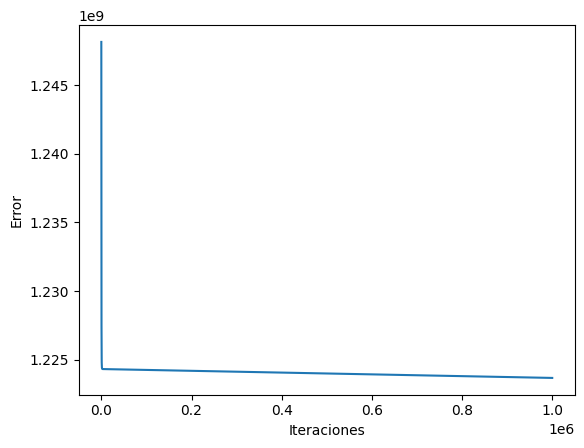

In [72]:
graficar_error(error)

In [29]:
def graficar_modelo(modelo, n):
    modelo_np = np.array(modelo)
    for i, row in enumerate(modelo_np):
        if (i+1) % n == 0:
            x = np.linspace(-5,10,10)
            y = row[1] * x + row[0]
            plt.plot(x, y, label=(i+1))
    plt.title('Modelo')
    plt.xlabel('x', color='#1C2833')
    plt.ylabel('y', color='#1C2833')
    plt.legend(loc='best')
    # plt.legend(loc='lower right')
    plt.grid()
    plt.show()

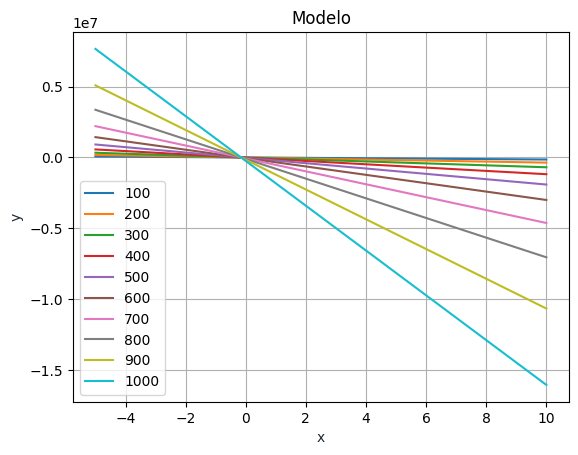

In [35]:
graficar_modelo(modelo, 100)

In [66]:
modelo, error = entrar_modelo(variables_x2, variables_y, 1000000, 100000, -0.0000005)

C:\Users\sguzman\AppData\Local\Temp\ipykernel_46528\2911577463.py:17: RuntimeWarning: overflow encountered in power
  error = np.mean(np.power(y_real - y_calculada, 2)) / 2
C:\Users\sguzman\AppData\Local\Temp\ipykernel_46528\2911577463.py:26: RuntimeWarning: invalid value encountered in double_scalars
  b1 = b1 - (alpha*gradiente_b1)


El error es de: nan


KeyboardInterrupt: 

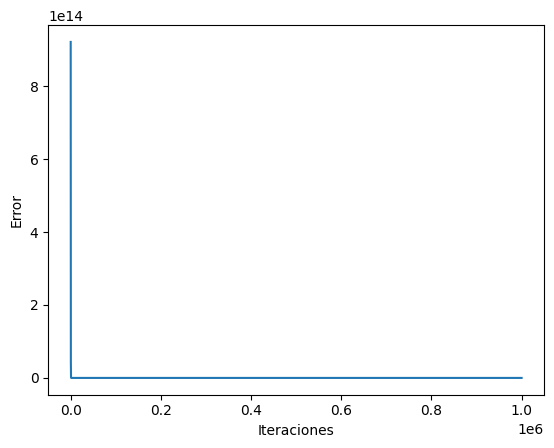

In [62]:
graficar_error(error)

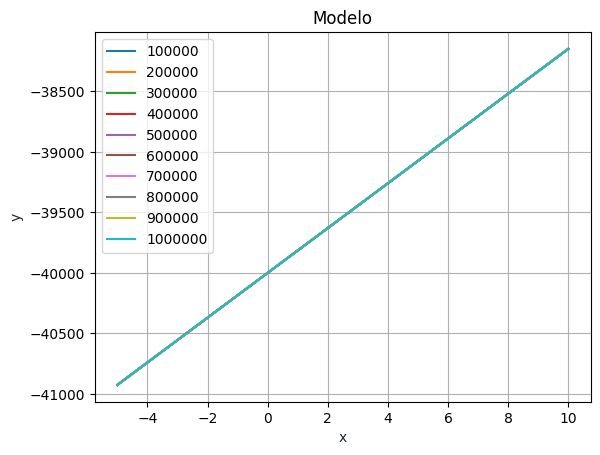

In [63]:
graficar_modelo(modelo, 100000)

In [64]:
modelo

[[-40000.00020414449, 35347.60627934894],
 [-40000.0004074079, 35195.870179026075],
 [-40000.00060979403, 35044.788861220935],
 [-40000.000811306665, 34894.359500368984],
 [-40000.00101194958, 34744.57928309874],
 [-40000.001211726514, 34595.44540817921],
 [-40000.00141064122, 34446.95508646745],
 [-40000.00160869741, 34299.10554085646],
 [-40000.001805898784, 34151.89400622316],
 [-40000.00200224904, 34005.31772937678],
 [-40000.002197751855, 33859.37396900728],
 [-40000.002392410875, 33714.05999563415],
 [-40000.00258622975, 33569.37309155529],
 [-40000.002779212096, 33425.310550796254],
 [-40000.00297136153, 33281.86967905961],
 [-40000.00316268164, 33139.04779367454],
 [-40000.00335317601, 32996.84222354668],
 [-40000.0035428482, 32855.250309108174],
 [-40000.00373170176, 32714.26940226792],
 [-40000.00391974022, 32573.896866362047],
 [-40000.004106967106, 32434.1300761046],
 [-40000.00429338591, 32294.96641753846],
 [-40000.00447900012, 32156.40328798643],
 [-40000.00466381321, 32